In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score


# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario8_individual_model_approach"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2020-09-18 16:57:16.334261
EndTime : 2020-09-18 16:59:27.950281
AEW541’s final rmse value is = 1.095979
AEW541 R-squared value is = -0.120160
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2020-09-18 16:59:28.094892
EndTime : 2020-09-18 17:00:27.703860
Nilotinib’s final rmse value is = 0.649905
Nilotinib R-squared value is = -0.486138
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2020-09-18 17:00:27.857448
EndTime : 2020-09-18 17:02:30.069476
17-AAG’s final rmse value is = 1.400416
17-AAG R-squared value is = -0.122280
PHA-665752_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2020-09-18 17:02:30.244007
EndTime : 2020-09-18 17:03:27.985427
PHA-665752’s final rmse value is = 0.739033
PHA-665752 R-squared value is = -0.034103
Lapatinib_//n
train_X shape: (303, 21213)
303 train samples
75 test sam

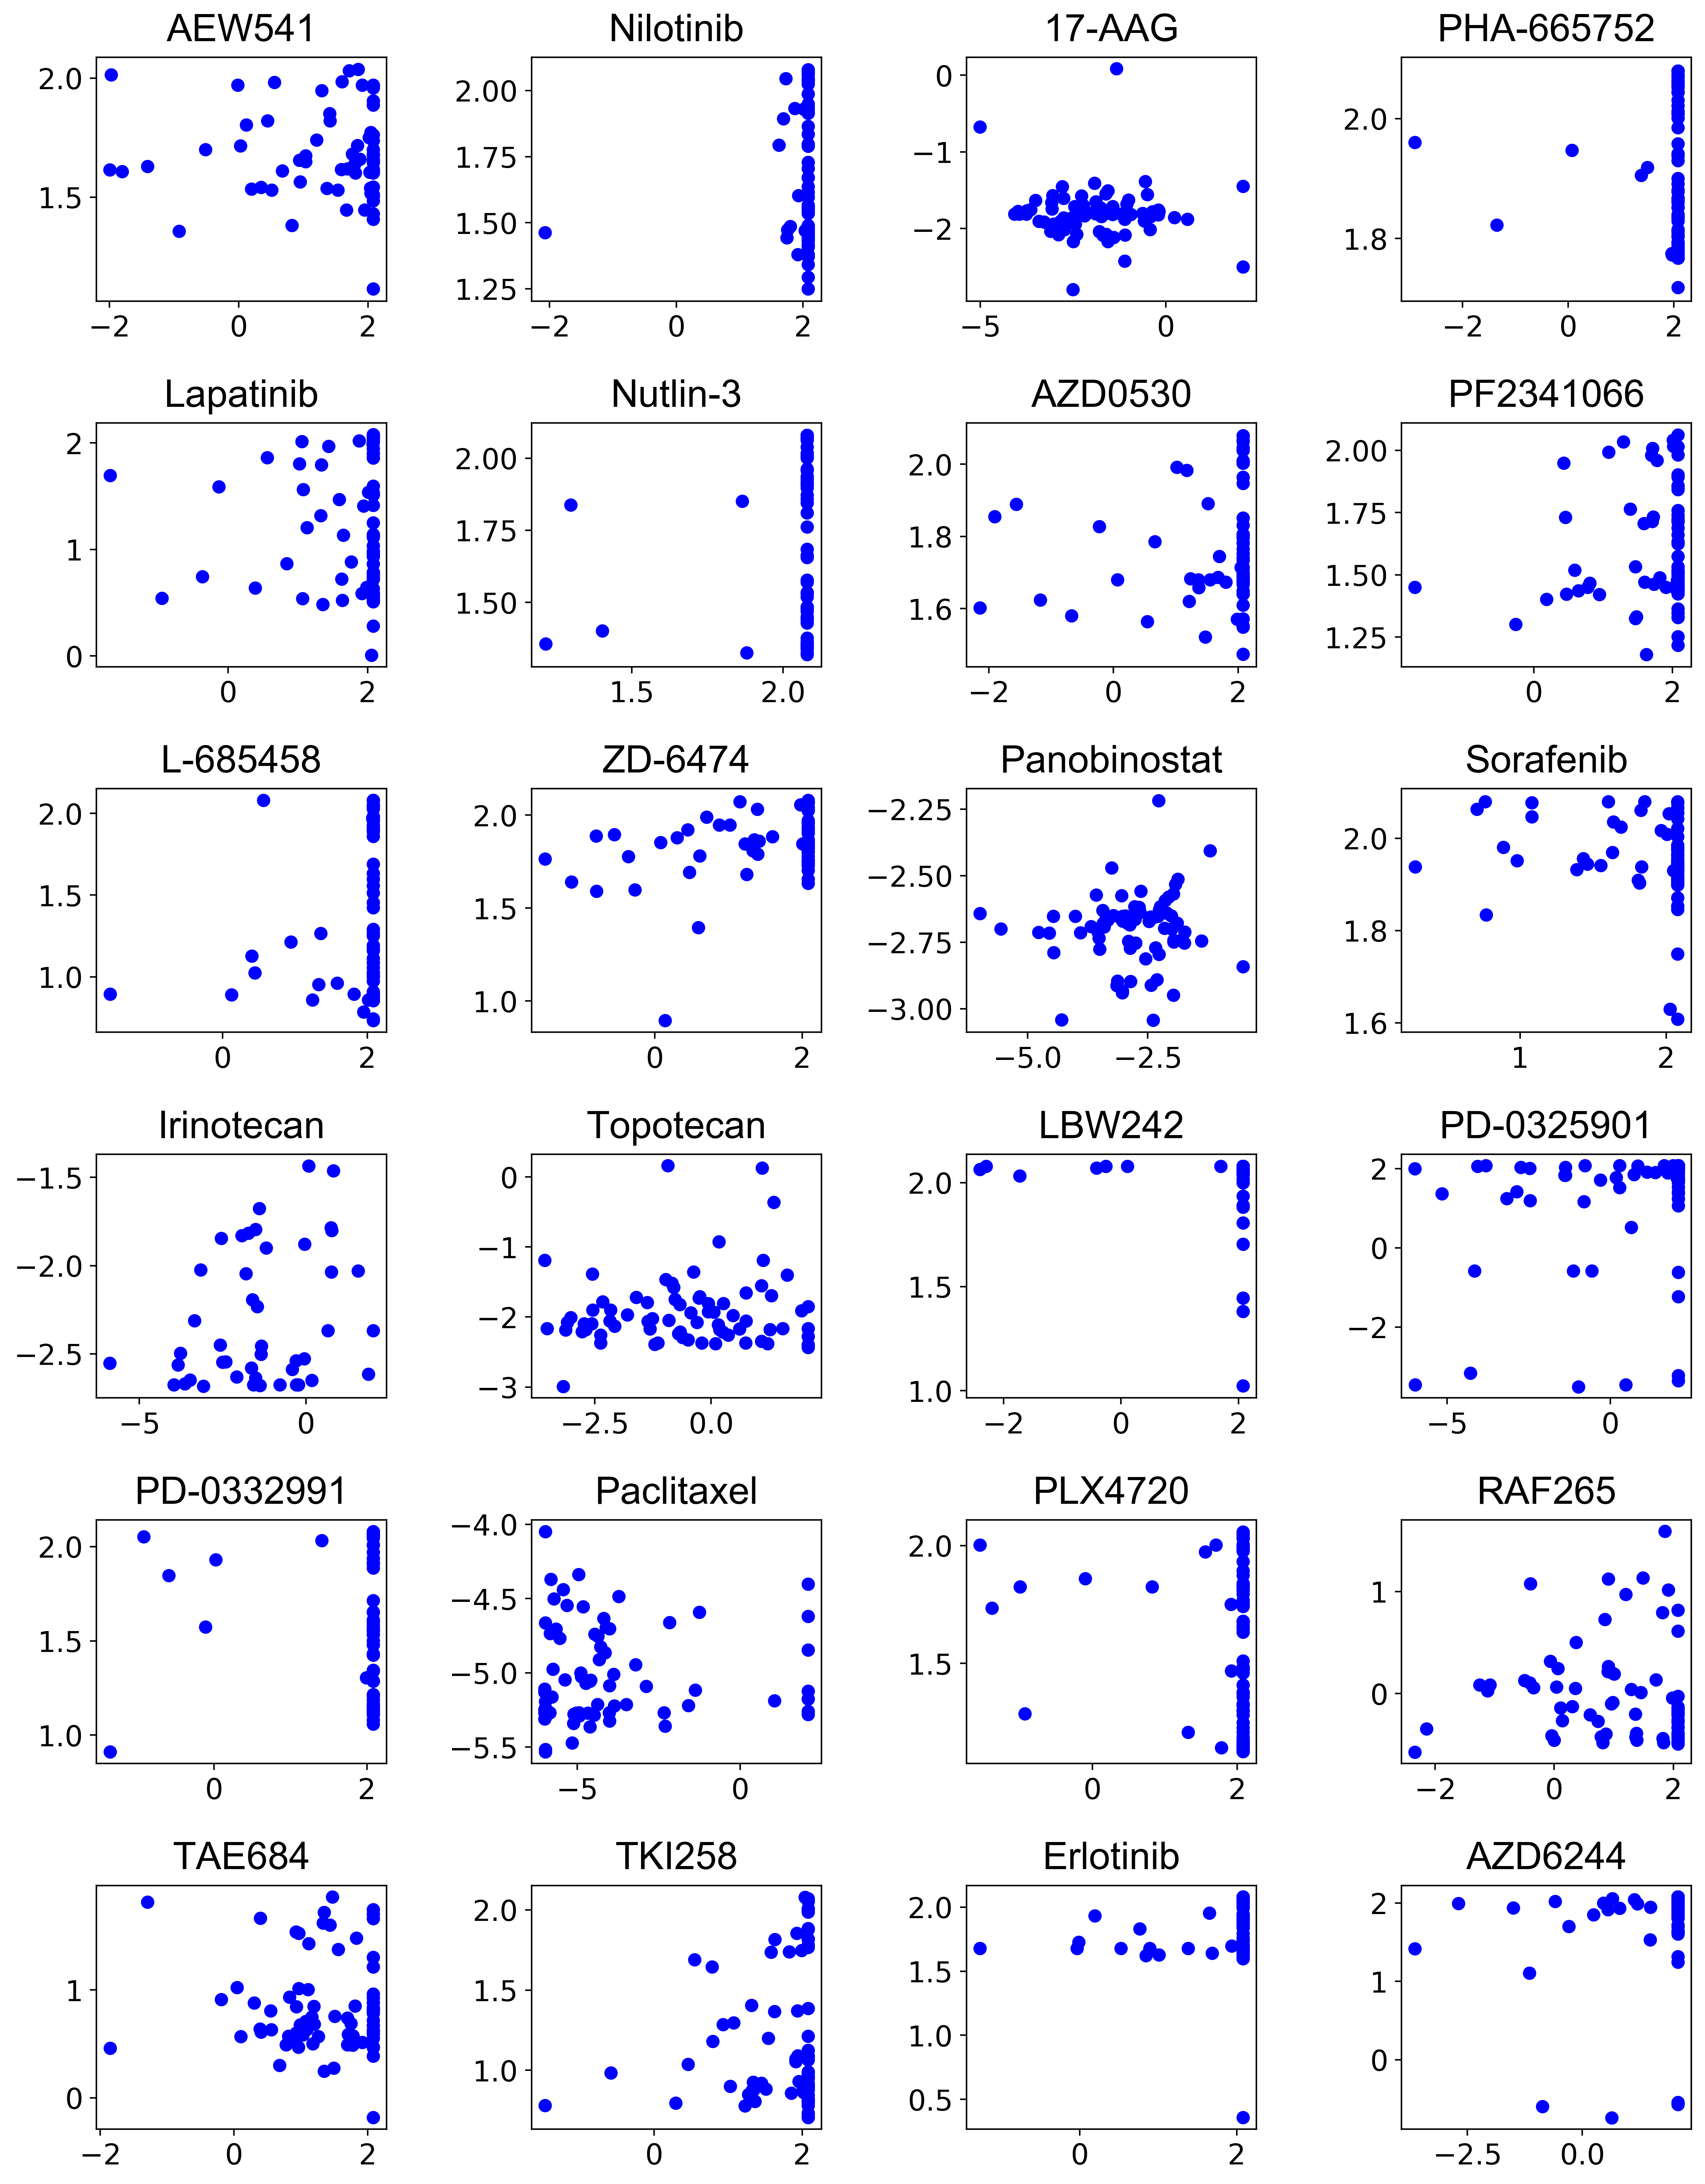

In [3]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(workdir + "//200914_MC9K_%s.npz" % dname)
    ss0 = np.load(workdir + '//200914_MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    rf = RandomForestRegressor(random_state = 84)
    # Train the model on training data
    rf.fit(train_X, train_y)

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = rf.predict(test_X)
    predicted_value = predicted_classes
        
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Table//RF"
    c.to_csv(workdir + '//200915_scenario8_RF_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//scenario8_individual_model_approach"
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//scenario8_individual_approach//Figure"    

plt.savefig(workdir +'//200915_scenario8_RF_plot.png', dpi=400)

In [4]:
num

25

In [5]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [6]:
result

,Drug,RMSE,R2value
0,AEW541,1.095979,-0.120160
1,Nilotinib,0.649905,-0.486138
2,17-AAG,1.400416,-0.122280
3,PHA-665752,0.739033,-0.034103
4,Lapatinib,1.121180,-1.371773
5,Nutlin-3,0.475761,-8.430255
6,AZD0530,0.971013,-0.009559
7,PF2341066,0.700179,-0.062631
8,L-685458,0.881622,-1.248133
9,ZD-6474,0.947237,-0.047214


In [7]:
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//Scenario8_individual_approach" 
result.to_csv(workdir +'//200915_scenario8_RF_24drugs_metrics.csv', index=False)